In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import artm

# change log style
lc = artm.messages.ConfigureLoggingArgs()
lc.minloglevel = 3
lib = artm.wrapper.LibArtm(logging_config=lc)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from copy import deepcopy
from topicnet.cooking_machine.models.topic_model import TopicModel
from topicnet.cooking_machine.cubes import RegularizersModifierCube
from topicnet.cooking_machine.models.blei_lafferty_score import BleiLaffertyScore
from topicnet.cooking_machine.config_parser import build_experiment_environment_from_yaml_config

from topicnet.cooking_machine.experiment import Experiment
from topicnet.cooking_machine.cubes import *
from topicnet.cooking_machine.dataset import Dataset

%load_ext autoreload
%autoreload 2

In [3]:
import topicnet.cooking_machine.cubes as tncubes

In [4]:
from IPython.core.display import display, HTML
from IPython.display import clear_output, display_html
display(HTML("""<style>
.container { width:90% !important; }
div.output_scroll .output_subarea { white-space: pre; }
</style>"""))

### Get dataset

In [5]:
DATASET_PATH = "/home/sultan/datasets/PScience/PScience.csv"

In [6]:
dataset = Dataset(DATASET_PATH)
dictionary = dataset.get_dictionary()

In [7]:
print(dataset.get_possible_modalities())
dataset.get_dataset().head()

{'@2gramm', '@3gramm', '@word', '@title', '@snippet', '@post_tag', '@author'}


,vw_text,raw_text
id,,
1.txt,1.txt |@author fuchs preobrazhensky tabachniko...,@title Автограф # «Математический дивертисмент...
2.txt,2.txt |@word книга:2 лекция:3 рассматриваться:...,@title Главы: Маскулинности в российском конте...
3.txt,3.txt |@word развитие появляться пиджина:4 бел...,@title Пиджины и креольские языки | @snippet Л...
4.txt,4.txt |@word стандартный задача:3 состоять:4 р...,@title FAQ: Физиология микроводорослей | @snip...
5.txt,5.txt |@2gramm повседневный_практика государст...,@title Русская государственная идеология | @sn...


### Make initial model

In [8]:
with open("/home/sultan/recipes/ARTM_baseline.yml", "r") as f:
    yaml_string = f.read()

specific_topics = [f'topic_{i}' for i in range(50)]
background_topics = [f'bcg_{i}' for i in range(len(specific_topics),len(specific_topics) + 1)]

yaml_string = yaml_string.format(
    modality_list=['@2gramm', '@word', '@post_tag', '@3gramm'],
    main_modality='@word',
    dataset_path=DATASET_PATH,
    specific_topics=specific_topics,
    background_topics=background_topics)

print(yaml_string)

# This config follows a strategy described by Murat Apishev
# one of the core programmers of BigARTM library in personal correspondence.
# According to his letter 'decent' topic model can be obtained by
# Decorrelating model topics simultaneously looking at retrieved TopTokens


# Use .format(modality_list=modality_list, main_modality=main_modality, dataset_path=dataset_path,
# specific_topics=specific_topics, background_topics=background_topics)
# when loading the recipe to adjust for your dataset

topics:
# Describes number of model topics, better left to the user to define optimal topic number
    specific_topics: ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 

### Run experiment

In [9]:
from topicnet.cooking_machine.experiment import Experiment
if os.path.exists(f'./MuratDemo50') == True:
    os.system("rm -rf ./MuratDemo50")
experiment, dataset = build_experiment_environment_from_yaml_config(
    yaml_string,
    experiment_id="MuratDemo50",
    save_path="MuratDemo50"
)

In [10]:
experiment.run(dataset)

/home/sultan/miniconda3/lib/python3.6/site-packages/topicnet/cooking_machine/cubes/base_cube.py:206: UserWarning: Perplexity is too high for threshold 1.05
  warnings.warn(warning_message)


{<topicnet.cooking_machine.models.topic_model.TopicModel at 0x7f9693d179b0>}

In [11]:
experiment.show()

Experiment MuratDemo50

Experiment was made with BigARTM 0.9.0
Tree:
                                ┌##11h25m44s_13d11m2019y###
                                ├##11h26m49s_13d11m2019y###
                                ├##11h27m54s_13d11m2019y###
                                ├##11h28m59s_13d11m2019y###
<<<<<<<<<<<root>>>>>>>>>>>──────┤
                                ├##11h30m05s_13d11m2019y###
                                ├##11h31m08s_13d11m2019y###
                                ├##11h32m15s_13d11m2019y###
                                └##11h33m22s_13d11m2019y###
Cubes:
 START                          | REG_MODIFIER                                                                                         
                                | cube:                                                                                                
 name:                          |   <topicnet.cooking_machine.cubes.regularizer_cube.RegularizersModifierCube object at 0x7f9693a2a9b0>
  

In [12]:
best_model = experiment.select(experiment.criteria[-1][0])[0]

In [13]:
best_model.describe_regularizers()

tau  gamma
model_id                   regularizer_name                    
##11h32m15s_13d11m2019y### smooth_phi_bcg      19.899208    NaN
                           smooth_theta_bcg   187.195195    NaN
                           decorrelation_phi    0.050000    0.0

In [14]:
best_model.describe_scores()

last_value
model_id                   score_name                                                                               
##11h32m15s_13d11m2019y### PerplexityScore@all                                                           4.15544e+09
                           SparsityThetaScore                                                              0.0612198
                           SparsityPhiScore@2gramm                                                          0.759292
                           PerplexityScore@2gramm                                                            1561.76
                           TopicKernel@2gramm.average_coherence                                                    0
                           TopicKernel@2gramm.average_contrast                                              0.481525
                           TopicKernel@2gramm.average_purity                                                0.333889
                           TopicKernel@2gramm.average_size                                                   146.765
                           TopicKernel@2gramm.coherence            {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@2gramm.contrast             {'topic_0': 0.4589266777038574, 'topic_1': 0.4...
                           TopicKernel@2gramm.purity               {'topic_0': 0.32286953926086426, 'topic_1': 0....
                           TopicKernel@2gramm.size                 {'topic_0': 72.0, 'topic_1': 177.0, 'topic_2':...
                           TopicKernel@2gramm.tokens               {'topic_0': ['уплата_налог', 'хотеть_отметить'...
                           SparsityPhiScore@word                                                             0.59526
                           PerplexityScore@word                                                              3010.67
                           TopicKernel@word.average_coherence                                                      0
                           TopicKernel@word.average_contrast                                                0.456458
                           TopicKernel@word.average_purity                                                  0.102716
                           TopicKernel@word.average_size                                                     261.843
                           TopicKernel@word.coherence              {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@word.contrast               {'topic_0': 0.45919278264045715, 'topic_1': 0....
                           TopicKernel@word.purity                 {'topic_0': 0.06253159791231155, 'topic_1': 0....
                           TopicKernel@word.size                   {'topic_0': 56.0, 'topic_1': 84.0, 'topic_2': ...
                           TopicKernel@word.tokens                 {'topic_0': ['посттравматический', 'олигархия'...
                           SparsityPhiScore@post_tag                                                        0.884735
                           PerplexityScore@post_tag                                                          40.3066
                           TopicKernel@post_tag.average_coherence                                                  0
                           TopicKernel@post_tag.average_contrast                                            0.727205
                           TopicKernel@post_tag.average_purity                                              0.816223
                           TopicKernel@post_tag.average_size                                                 21.2549
                           TopicKernel@post_tag.coherence          {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@post_tag.contrast           {'topic_0': 0.78618985414505, 'topic_1': 0.720...
                           TopicKernel@post_tag.purity             {'topic_0': 0.8338468074798584, 'topic_1': 0.8...
           

## Results

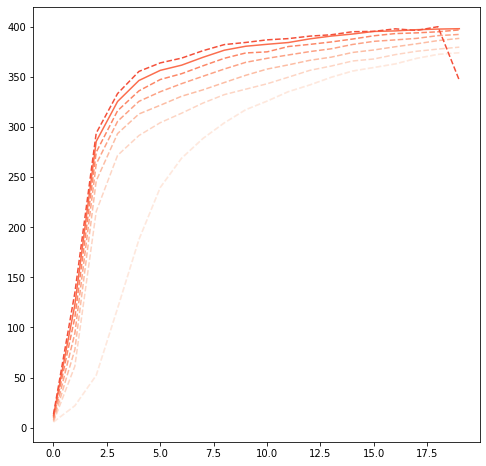

In [15]:
from matplotlib import cm
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['BleiLaffertyScore']
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

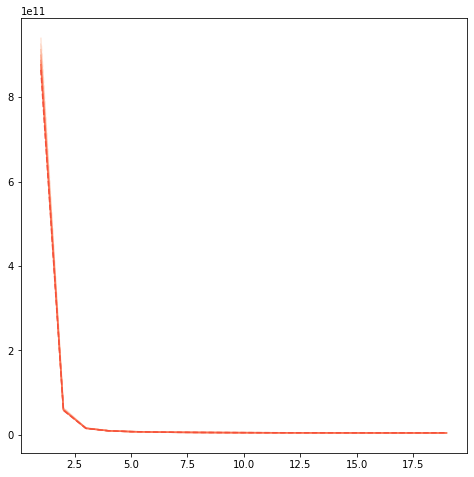

In [16]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['PerplexityScore@all']
    score[0] = float("nan")
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

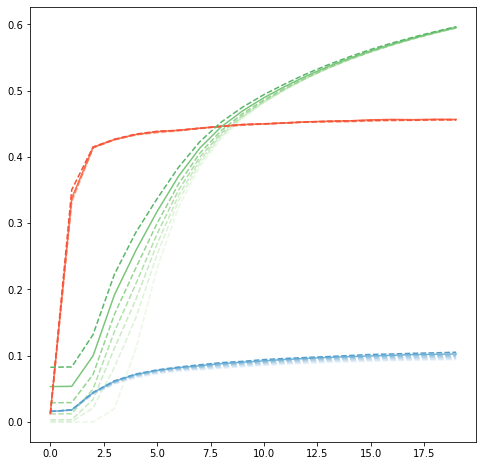

In [17]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@word.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@word.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    
    score = tm.scores['SparsityPhiScore@word']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

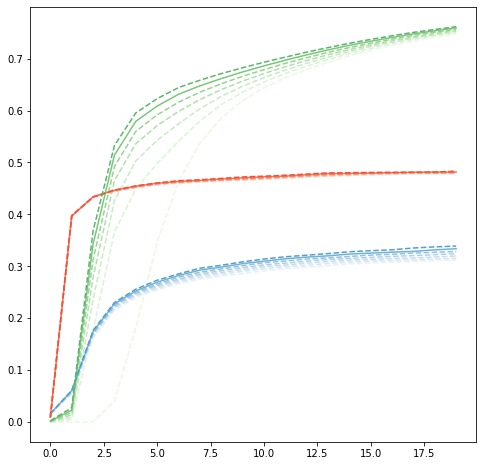

In [18]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@2gramm.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@2gramm.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    
    score = tm.scores['SparsityPhiScore@2gramm']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

## Investigate model

In [19]:
from topicnet.viewers.top_tokens_viewer import TopTokensViewer
from topicnet.viewers.top_documents_viewer import TopDocumentsViewer

In [20]:
first_model_top_tok = TopTokensViewer(best_model, num_top_tokens=10, method='phi')
first_model_html =  first_model_top_tok.to_html(first_model_top_tok.view())
first_model_top_doc = TopDocumentsViewer(best_model, dataset=dataset).view()

In [21]:
from IPython.display import display_html, display
from topicnet.cooking_machine.dataset import get_modality_vw


n=None
for line, topic_docs in list(zip(first_model_html, first_model_top_doc))[:n]:
    display_html(line, raw=True)
    for doc_id in topic_docs:
        doc_vw = dataset.get_vw_document(doc_id).values[0][0]
        doc_title = get_modality_vw(doc_vw, "@title")
        doc_snippet = get_modality_vw(doc_vw, "@snippet")
        display_html(f"<b>{doc_title}</b><br />{doc_snippet}", raw=True)

,topic_0 @2gramm
политический_философия,0.03775
центральный_банк,0.03469
государственный_долг,0.018
лео_штраус,0.01379
центральный_банка,0.01259
флуоресцентный_белка,0.01153
политический_теория,0.0115
политический_режим,0.01105
валютный_курс,0.01064
политический_мысль,0.01047


faq«государь» макиавелли 6 фактов об одном из главных политических философов

главы # белл и его «подрывное» открытие отрывок из книги "главный рубильник. расцвет и гибель информационных империй" профессора колумбийского университета тима ву

тирания в античной политической философии философ александр павлов о значении худшего политического режима в трудах платона, ксенофонта и аристотеля

тирания у ксенофонта философ александр павлов о диалоге «гиерон», философии ксенофонта в работах лео штрауса и проекте добродетельной тирании

faqполитическая теория эмоций 7 фактов об истории политической мысли и новом интересе к чувствам

тирания у платона философ александр павлов о политической философии платона, понимании тирании в диалогах «государство» и «законы» и идеальном политическом режиме

прямая речьартём оганов химик, профессор университета штата нью-йорк о советском образовании, «наркотических городах» и перспективах работы в россии

«государь» макиавелли философ александр павлов о макиавеллизме, кембриджской школе истории политической мысли и 26-ой главе

faqфинансовая репрессия 8 фактов о механизмах регулирования государством финансовых рынков в развивающихся экономиках

политическая философия эроса о понятии эроса и эрота в дискуссии о тирании у платона, ксенофонта и аристотеля, идеальном правителе и высшей форме страсти

,topic_1 @2gramm
нобелевский_премия,0.02749
органический_химия,0.01714
кристаллический_структура,0.01445
высокий_давление,0.01073
химический_связь,0.01013
химический_реакция,0.00889
химический_соединение,0.00837
новое_материал,0.00807
новый_материал,0.00776
химический_состав,0.00674


дизайн сверхтвердых материалов химик артем оганов о структуре алмаза, применении сверхтвердых материалов и новых формах углерода

премии # нобелевская премия мира - 2013 спецпроект постнауки, посвященный нобелевской неделе и её результатам

фуллерены нобелевский лауреат по химии харольд крото о молекулярных решетках, исследовании углеродных звезд и фундаментальной науке

гетероциклические циркулены химик валентин ненайденко об органической химии, красоте молекул и «серных цветках»

методы предсказания кристаллических структур химик артем оганов о задачах кристаллографии, методе uspex и структуре алмаза

нобелевская премия по физиологии или медицине — 2015 патобиолог юрген рихт о концепции «единого здоровья», древнем труде китайского травника и лекарствах на основе природных продуктов

существует ли предел количества химических элементов? химик иван сорокин о принципах отображения в таблице и поиске новых химических элементов

«запрещенная» химия и новые неожиданные материалы химик артем оганов о методе проб и ошибок, расшифровке кристаллических структур и предсказании новых материалов

прямая речьвалерий фокин руководитель лаборатории химического синтеза и катализа центра живых систем мфти об истории с нобелевской премией, клик-химии и вертикальной ментальности российского общества

премии # нобелевская премия по экономике - 2013 спецпроект постнауки, посвященный нобелевской неделе и её результатам

,topic_2 @2gramm
история_наука,0.01024
учёный_степень,0.00858
xx_век,0.00789
центральный_мексика,0.00734
история_искусство,0.00698
умберто_эко,0.00504
человеческий_тело,0.00498
xxi_век,0.00453
гуманитарный_наука,0.00449
история_религия,0.00425


ацтекская империя историк дмитрий беляев о тройственном союзе ацтеков, формировании империи в теночтитлане и военно-религиозной идеологии

точка зрения # эффективны ли научные степени в россии? мнения экспертов постнауки об эффективности научных степеней в xxi веке

faqклассика как объект и как знание 6 фактов о становлении понятия «классика», его развитии в различные эпохи и критериях отбора классики и классиков

ранние земледельцы мезоамерики историк дмитрий беляев об этапах заселения мезоамерики, истории кукурузы и культуре алкогольных напитков

история древней мезоамерики 10 лекций историка дмитрия беляева о становлении мезоамериканской цивилизации, ее культуре и политической жизни

антропология апокалипсиса религиовед ивар максутов о новой антропологии, готовности встретить конец света и постколониальном мире

5 книг по истории доколумбовой америки что читать об индейских культурах нового cвета, рекомендует кандидат исторических наук дмитрий беляев

кризис мезоамериканских государств классического периода историк дмитрий беляев о процессе балканизации, упадке теотиуакана и самом масштабном батальном памятнике в истории

михаил ямпольский«никакого искусства не существует, есть разные антропологические практики постижения мира» интервью с философом михаилом ямпольским о границах искусства, формах его легитимации и конце большого стиля

сатанизмот средневекового христианства до лавея в чем разница между дьяволопоклонством и антихристианством, является ли сатанизм религией, какие символы он использует и чему посвящена библия сатаны

,topic_3 @2gramm
мировой_война,0.03858
веймарский_республика,0.0141
третье_рейх,0.0079
советский_россия,0.00763
нацистский_германия,0.00742
российский_империя,0.00705
окись_углерод,0.00651
католический_церковь,0.00612
советский_союз,0.00534
научный_музей,0.00512


папство и россияистория дипломатических отношений как развивались отношения москвы и святого престола и с какими проблемами им приходилось сталкиваться?

главы«брачная политика» пруссии и россии отрывок из книги «екатерина ii, германия и немцы» историка клауса шарфа о культурных и политических связях российской империи с дворами германии

5 книг по истории германии в хх веке что читать об историческом развитии германии от веймарской республики до современности, рекомендует кандидат исторических наук илья женин

левый терроризм в германии историк илья женин о студенческих протестах 1968 года, «фракции красной армии» и трагических событиях «немецкой осени»

веймарская республика историк илья женин о республике без республиканцев, октябрьской революции и социал-демократической партии

репрессивный аппарат третьего рейха историк илья женин об антисемитской политике, хрустальной ночи и лагерях смерти в нацистской германии

объединение германии историк илья женин о перестройке в ссср, падении берлинской стены и последствиях объединения гдр и фрг

главы # тыл в первую мировую отрывок из книги «первая мировая войнакатастрофа 1914 года» британского историка макса хейстингса о быте мирного населения воюющих стран

берлинская стена историк илья женин о восточном и западном берлине, экономических проблемах гдр и «железном занавесе»

автограф # «свитки из пепла. еврейская “зондеркоммандо” в аушвице-биркенау и ее летописцы» историк павел полян о главных документах холокоста, членах зондеркоманды и осмыслении опыта концентрационных лагерей

,topic_4 @2gramm
индоевропейский_язык,0.01584
языковой_семья,0.01442
человеческий_язык,0.01116
языковой_разнообразие,0.00871
разный_язык,0.00835
исторический_языкознание,0.00825
устный_речь,0.00743
индоевропейский_семья,0.00712
коммуникативный_система,0.00665
язык_африка,0.00624


машинный перевод на основе правил лингвист леонид иомдин о контроле смысла переведенного текста, интегральном описании языка и синтаксической неоднозначности

тело в русском языке и культуре лингвист григорий крейдлин о семиотической концептуализации тела, глубине членимости и свойствах телесных объектов

faqмультимодальная лингвистика 6 фактов о невербальной коммуникации, процессе понимания речи и будущем лингвистики

5 книг о сравнительно-историческом языкознании что читать о методах и различных теориях компаративной лингвистики, рекомендует кандидат филологических наук георгий старостин

как взаимодействуют язык бытовой и язык официальный? лингвист борис иомдин об активном словарном запасе, языковых изменениях и текстах официальных документов

faqлингвистический анализ рассказов 6 фактов относительно структуры рассказа, компетенций рассказчика и дискурсивного жанра

5 книг о компаративной лингвистике что читать о сравнительном изучении языков, рекомендует филолог георгий старостин

прямая речь # владимир плунгян лингвист, один из создателей национального корпуса русского языка об обывательской беззащитности, касте лингвистов и школьном русском

булгарские заимствования в венгерском языке лингвист анна дыбо о тюркских языках, их взаимоотношениях и территории пересечения и примерах заимствованных слов

faqреконструкция грамматики праязыка 7 фактов о возможности воссоздания общечеловеческого праязыка методами сравнительного языкознания

,topic_5 @2gramm
советский_союз,0.01794
политика_память,0.01398
малое_город,0.01306
гражданский_война,0.01104
промышленный_революция,0.00932
крупный_город,0.00923
мировой_война,0.00918
советский_власть,0.00839
красный_армия,0.00838
обычный_право,0.00803


главысталин на войне отрывок из книги «сталин. жизнь одного вождя» историка олега хлевнюка о роли сталина в поражениях и победах в великой отечественной войне

главыинтерпретации сталинградской битвы отрывок из книги «сталинградская битвасвидетельства участников и очевидцев», вышедшей под редакцией историка йохена хелльбека

главы # распределенный капитализм отрывок из книги «третья промышленная революция» экономиста и эколога джереми рифкина

эпоха сталина 11 материалов историка олега хлевнюка о зарождении и гибели сталинской эпохи, проблемах ее интерпретации и значении для мировой истории

коллективизация историк олег хлевнюк о создании колхозов, ликвидации кулачества и значении коллективизации для индустриализации

приход сталина к власти историк олег хлевнюк о системе коллективного руководства после смерти ленина, заявлении сталина об отставке и полном контроле над органами госбезопасности

экологические проблемы малых городов 7 фактов о видах и причинах загрязнений городов с численностью менее 50 тысяч человек

культурная память о первой мировой историк борис колоницкий об источниках информации о первой мировой войне, политике памяти европейских стран и травме гражданской войны

предпосылки десталинизации историк олег хлевнюк о проблемах послевоенного ссср, демонтаже гулага и наследии сталинского режима

противоречия сталинизма в послевоенный период историк олег хлевнюк о репрессивной политике сталина, социально-экономическом кризисе послевоенного периода и либерализации советского режима после 1953 года

,topic_6 @2gramm
нитрид_бора,0.03056
юрский_период,0.01659
южный_африка,0.01595
южный_америка,0.01545
северный_америка,0.01137
история_земля,0.0094
живой_организм,0.00864
меловой_период,0.00713
растительный_остаток,0.00681
новый_вид,0.00676


«многие юрские животные продолжили свое развитие и даже имеют потомков в наше время» палеонтолог чжунхэ чжоу о многообразии удивительных животных юрского периода

«сухопутные мосты между материками требовались, чтобы объяснить распространение животных» интервью с палеонтологом кириллом еськовым об исторической биогеографии и палеонтологической проверке гипотез по расселению различных видов

особенности строения голосеменных класса войновскиевых о спорных вопросах в изучении одной из самых своеобразных групп голосеменных растений, произраставших на земле в конце палеозойской эры

находка из кении прольет свет на происхождение бегемотов о новых палеонтологических находках, установлении связей между видами и истории эволюции гиппопотамов

точка зрения # грозит ли нам шестое массовое вымирание видов? мнения экспертов постнауки о потере биоразнообразия в современный период и угрозе глобального вымирания видов

композиты с использованием bn-нанотрубок материаловед дмитрий гольберг о наноструктурах из нитрида бора, графеноподобных материалах и улучшении свойств полимеров

полимеры и биополимеры химик артем оганов о структуре и физических свойствах полимеров, использовании полимерных материалов и задаче предсказания структуры белка

динамика экосистем в калмыкии биолог андрей чабовский об адаптации животных к среде, принципе эргодичности и пороговых нагрузках на экосистему

палеонтологические обоснования теории эволюции палеонтолог андрей иванцов о доказательствах теории эволюции, геологической истории земли и изменениях трилобитов

представлены оценки влияния человека как вида на биосферу земли об основных этапах эволюции биосферы, воздействии людей на живые организмы и возможных сценариях изменения окружающей среды

,topic_7 @2gramm
трансгенный_растение,0.01888
ядерный_энергетика,0.01288
метод_ямр,0.00994
сельский_хозяйство,0.00969
социальный_сеть,0.00739
источник_энергия,0.00726
солнечный_свет,0.00687
органический_соединение,0.00674
электронный_почта,0.00664
данный_момент,0.00646


точка зрениягенетически модифицированные организмы мнения экспертов постнауки о влиянии гмо на сельское хозяйство, научные исследования и общество

faqоценка безопасности гмо 7 фактов о генетически модифицированных растениях и испытаниях на биобезопасность

анализ социальных сетей в интернете специалист по современной технике медиакоммуникаций берни хоган o том, как собирались и анализировались электронные социальные сети и что могут дать их исследования

faqатомная энергетика сегодня 7 фактов о перспективах развития атомной промышленности в современном мире

оценка безопасности гмо биолог дмитрий дорохов о диких растениях, испытаниях на биобезопасность и процессе регистрации гмо

биотехнологии и общество биолог дмитрий дорохов об уровне доверия общества к гмо, испытаниях на биобезопасность и съедобных вакцинах

faqядерный магнитный резонанс 5 фактов о природе магнитных полей, спектре ядерного магнитного резонанса и применении метода ямр в современной химии

вычислительная линейная алгебра математик иван оселедец об умножении матрицы на вектор, быстрых алгоритмах и сингулярном разложении

микробные топливные элементыполучаем электричество, избавляясь от мусора биоинженер иоаннис иеропулос о новом способе получения энергии, основанном на метаболизме бактерий

водородная энергетика теплофизик виктор зайченко о получении водорода, пироуглероде и распределенной энергетике

,topic_8 @2gramm
естественный_отбор,0.02611
половый_отбор,0.01732
homo_sapiens,0.01277
теория_эволюция,0.00794
человекообразный_обезьяна,0.00762
эволюционный_биология,0.0068
ход_эволюция,0.00631
австралийский_абориген,0.00621
образ_жизнь,0.00596
речь_идти,0.00559


главыобезьяночеловек отрывок из книги «рассказ предка» биолога ричарда докинза об истоках эволюционного древа и общих предках всех живых организмов

«социальная моногамия совершенно не коррелирует с сексуальной моногамией» интервью с биологом андреем чабовским о феномене моногамии, теории конфликта полов и причинах привязанности между партнерами

новое о параллельных человечествах антрополог мария медникова о сапиенсах, неандертальцах и денисовцах

автограф # «происхождение языка» автор теории развития языка рассказывает о своём исследовательском методе, эволюционных преимуществах коммуникации и происхождении альтруизма

происхождение homo sapiens антрополог станислав дробышевский о проблемах датировки, африканском человечестве и концепции вулканической зимы

эволюция человека тест про австралопитеков, неандертальцев и других предшественников людей

австралия - тысячи лет одиночества антрополог станислав дробышевский о мегафауне австралии, появлении собаки динго и теориях происхождения австралийцев

австралопитеки антрополог станислав дробышевский о разнообразии способов хождения, особенностях диеты и физиологии австралопитеков

древнейший homo sapiensв погоне за первым человеком антрополог станислав дробышевский о происхождении современного вида человека, поведении homo sapiens и различии человека и шимпанзе

антропогенез 10 лекций антрополога станислава дробышевского о происхождении человека и его изменчивости как вида во времени

,topic_9 @2gramm
элементарный_частица,0.04603
стандартный_модель,0.04402
бозон_хиггс,0.04031
хиггсовский_бозон,0.01847
электрический_заряд,0.01314
космический_луч,0.0125
высокий_энергия,0.01215
новый_частица,0.0092
поколение_кварк,0.00826
зарядить_частица,0.00803


адроны физик дмитрий казаков о мире мезонов и барионов, свойствах кварков и адронных резонансах

линейный коллайдер физик михаил данилов о недостатках стандартной модели, изучении t-кварка и поиске новых измерений

стандартная модель физик михаил данилов об экспериментах на коллайдерах, массе фундаментальных частиц и суперсимметрии

детекторы для экспериментов на коллайдерах физик павел пахлов о взаимодействии элементарных частиц, устройстве детекторов и применении данной технологии в повседневной жизни

анализ экспериментальных данных в физике частиц физик лев дудко об экспериментах на коллайдерах, системе триггеров и программах реконструкции

антиводород физик владимир мележик об экзотических атомах, получении антивещества и расщеплении уровней энергии антиатомов

как работает фотонный коллайдер? физик валерий тельнов о рождении электрон-позитронных пар, высокоэнергетичных фотонах и взаимодействии света с материей

структура материи 9 лекций о строении вещества вселенной и частицах, ее составляющих, отобранных физиком михаилом даниловым

топ-кварк физик эдуард боос об обнаружении топ-кварка, его создании в лабораторных условиях и цвете элементарных частиц

бозон хиггса физик дмитрий казаков о симметрии, массе элементарных частиц и поисках бозона хиггса на коллайдерах

,topic_10 @2gramm
солнечный_система,0.05198
планетный_система,0.02538
космический_аппарат,0.01606
протопланетный_диск,0.01054
белых_карлик,0.01037
астрономический_единица,0.00886
образование_планета,0.0085
химический_состав,0.0075
магнитный_буря,0.00732
небесный_тело,0.00717


формирование планет и протопланетные диски астрофизик сергей попов об образовании планетных систем, снеговой линии и облаке оорта

есть ли жизнь на других планетах? астроном владимир сурдин о возможном расселении людей на луне, искусственных городах и внеземных цивилизациях

будущее экзопланетных исследований астрофизик сергей попов о поиске жизни на экзопланетах, международных космических проектах и наземных телескопах нового поколения

многообразие планет астрофизик сергей попов о газовых и ледяных гигантах, системах двойных звезд и одиночных планетах

образование планетных систем астроном дмитрий вибе о каменных планетах и планетах-гигантах, многообразии планетных систем и горячих юпитерах

faqобразование планетных систем 7 фактов о формировании скоплений звезд и различных незвёздообразных астрономических объектов

сверхземли астрофизик сергей попов о многообразии планет солнечной системы, свойствах сверхземель и составе экзопланет

измерение расстояний в астрономии астроном алексей расторгуев о расстояниях в пределах солнечной системы, околоземных спутниках и изучении сверхновых звезд

точка зрения # перспективы космических программ мнения экспертов постнауки о том, какое направление в области космических программ считается сегодня наиболее важным

автограф # «разведка далёких планет» астроном владимир сурдин рассказывает об издании научно-популярных книг в россии, отечественной космонавтике и любительской астрономии

,topic_11 @2gramm
массовый_культура,0.0451
культовый_кино,0.01868
cinema_studies,0.01736
гуманитарный_наука,0.01287
французский_революция,0.01038
плохой_кино,0.01002
хороший_вкус,0.0088
популярный_культура,0.00792
живой_мертвец,0.00745
анализ_фильм,0.00731


штурмуя публичное пространствослова о гетеротопии плохого вкуса философ александр павлов о теории кэмпа сьюзен сонтаг, русской традиции кинокритики и утопии хорошего вкуса

главы # скрытые механизмы идеологии в "бойцовском клубе" отрывок из книги «постыдное удовольствиефилософские и социально-политические интерпретации массового кинематографа» философа александра павлова

5 книг о культовом кинематографе что читать о культовом кино, рекомендует доцент философского факультета ниу вшэ александр павлов

гендерные исследования в cinema studies философ александр павлов о методах психоанализа в cinema studies, образе «последней девушки» и анализе кинематографа с позиций феминизма

автограф # «происхождение человеческих рас» станислав дробышевский рассказывает о своей книге, первой из цикла, посвященного происхождению рас

5 книг о зомби в массовой культуре что читать о роли живых мертвецов в современном мире, рекомендует доцент философского факультета вшэ александр павлов

«нет больше высокой и низкой культуры, есть просто культура сегодня» интервью с философом и культурологом александром павловым о философии массовой культуры, славое жижеке и обществе потребления

5 фильмов, раскрывающих образ ученого в популярной культуре кино, снятое по мотивам реальной жизни и исследований известных ученых, рекомендует культуролог александр павлов

5 книг об анализе фильма что читать об исследованиях кинематографа на примере анализа конкретных фильмов, рекомендует философ александр павлов

5 книг о философии и популярной культуре что читать о философских аспектах массовой культуры, рекомендует доцент философского факультета вшэ александр павлов

,topic_12 @2gramm
головной_мозг,0.02882
орган_чувство,0.01854
человеческий_мозг,0.01831
участок_мозг,0.01046
зеркальный_нейрон,0.00956
лобный_доля,0.00836
префронтальный_кора,0.00828
работа_мозг,0.00813
нейронный_сеть,0.00768
структура_мозг,0.0067


функции взрослых нейронов в мозге нейробиолог александр лазуткин о миграции нейронов, значении области гиппокампа и инфантильной амнезии

главы # выживаниемозг человека тоже эволюционировал отрывок из книги «правила мозга» молекулярного биолога джона медины

главывнутренняя сонастройка отрывок из книги «внимательный мозг» нейропсихолога дэниела сигела о внимательности, репрезентации намерения и возникновении эмоций

инсультпричины и симптомы что является причиной инсульта, какие симптомы помогут его распознать и какие способы лечения практикуются в современной медицине

каково научное обоснование гипноза? психофизиолог александр каплан о природных состояниях мозга, гипнозе у животных и «каналах доверия»

клеточные следы сознания в мозге нейробиолог константин анохин об исследованиях субъективного опыта, эпизодической памяти у животных и активности клеток в момент запоминания

проблема сознания и мозга нейробиолог константин анохин о коре головного мозга, изучении нервных коррелятов сознания и коматозных состояниях

главы # собирание воспоминаний отрывок из книги «коннектом. как мозг делает нас тем, кто мы есть» профессора mit себастьяна сеунга

потерянная память и история h.m. нейробиолог константин анохин об истории болезни генри молисона, роли гиппокампа и участках мозга, отвечающих за память

функция счета и технический прогресс психолог александр тхостов о высших психических функциях, объеме памяти и утрате навыков устного счета

,topic_13 @2gramm
чёрный_дыра,0.12899
звёздный_скопление,0.01337
спиральный_галактика,0.01144
млечный_путь,0.01132
туманность_андромеда,0.00925
центр_галактика,0.00855
дисковый_галактика,0.00805
эллиптический_галактика,0.00805
звёздный_система,0.00775
химический_состав,0.00744


главы # как все начиналось отрывок из книги «двигатели гравитации. как черные дыры управляют галактиками, звездами и жизнью в космосе» директора астробиологической обсерватории при колумбийском университете в нью-йорке kалеба шарфа

черные дыры в центрах галактик астрофизик ольга сильченко об открытии сверхмассивной черной дыры в туманности андромеды, исследованиях джона корменди и темных гравитирующих телах

как были открыты черные дыры промежуточной массы? о методах определения массы черной дыры и загадке ультрамощных рентгеновских источников

галактический «каннибализм» астроном алексей расторгуев об испарении звезд, измерении массы млечного пути и слиянии галактик

рентгеновское небо в фокусе астрофизик михаил ревнивцев о рентгеновских телескопах, болометрах и проекте обсерватории «спектр-рентген-гамма»

черные дыры физик эмиль ахмедов об изучении черных дыр, карле шварцшильде и гигантских черных дырах

faqэволюция протозвездных облаков 7 фактов об образовании звезд

в чем заключается проблема определения расстояния до плеяд? о звездных скоплениях, астрономической шкале расстояний и модели звездной эволюции

что изучает звездная астрономия? астроном алексей расторгуев о звездной астрономии как дисциплине, строении галактик и истории звездообразования

наблюдательные проявления черных дыр и кротовых нор астрофизик александр шацкий о фурье-образе, интерферометре «радиоастрон» и объектах с нетривиальной топологией

,topic_14 @2gramm
экономический_рост,0.0173
развивающийся_страна,0.013
заработный_плата,0.00997
мировой_экономика,0.00962
развитый_страна,0.00955
рабочий_место,0.00762
темп_рост,0.00751
экономический_теория,0.00727
центральный_банка,0.00722
рынок_труд,0.00718


главы # от пузыря к пузырю отрывок из книги «линии разломаскрытые трещины, все еще угрожающие мировой экономике» профессора чикагского университета рагурама раджана

экономические колебания экономист сергей афонцев о причинах роста и спада экономики, экономическом кризисе и несостоятельности теорий экономических циклов

главы # жиры и внимание к онкологическим заболеваниям отрывок из книг "китайское исследование" профессора биохимии колина кэмпбелла

faqнеформальность на рынке труда 6 фактов об интенсификации миграции и проблеме сопоставления заработков между разными секторами труда

faqоткрытие древних статуэток кавказа 5 фактов об исследованиях бронзовой антропоморфной пластики казбекского клада

faqсвятилища кавказа 7 фактов о сакральных местах кавказа языческого периода, об их археологическом исследовании и связи с христианскими церквями

главы # антропоморфная пластика, происходящая из святилищ кавказа отрывок из книги "древняя бронзовая антропоморфная пластика кавказа" историка ольги брилевой

5 книг об археологии кавказа что читать о начале изучения археологии кавказа в россии, важнейших находках и экспедициях, рекомендует кандидат исторических наук ольга брилева

главыработа и безработица отрывок из книги "как работает экономика" экономиста ха-джун чанга о роли работы и безработицы в глобальном мире

5 книг о причинах экономического неравенства что читать об имущественном расслоении и бедности, рекомендует кандидат экономических наук тимур натхов

,topic_15 @2gramm
мышечный_волокно,0.0088
потенциал_действие,0.00598
устный_традиция,0.00596
тесно_связать,0.00518
народный_культура,0.00503
важный_роль,0.00496
кровяной_давление,0.00471
традиционный_культура,0.00466
мышечный_клетка,0.0046
фольклорный_текст,0.00413


экспериментальная генетика поведения биолог инга полетаева о модельных животных, искусственном отборе и селекционных экспериментах

5 книг о сравнительной мифологии что читать о компаративном изучении мифологий, рекомендует доктор филологических наук сергей неклюдов

faqтеория речевых актов 5 фактов об аналитической теории речепорождения и понимании произведений художественной литературы

образ женщины в русских сказках фольклорист варвара добровольская о двух типах сказочных героинь, идеале женщины и происхождении бабы-яги

теория речевых актов филолог гасан гусейнов о седьмом письме платона, четырех фазах познания и чтении стихов

фольклор и обряд фольклорист сергей неклюдов о соотношении слова и действия, текстах заговорной традиции и ритуальной деятельности животных

faqфизиология эмоций 6 фактов о возникновении эмоций, их воздействии на организм и здоровье человека

введение в теоретическую фольклористику 11 лекций фольклориста сергея неклюдова о принципах изучения устных текстов и традиций

главыкак работают мышцы отрывок из книги «искра жизниэлектричество в теле человека» профессора физиологии фрэнсис эшкрофт о роли ионных каналов в организме человека

faqдетский фольклор 7 фактов об истории возникновения, сюжетах и формах детской мифологии

,topic_16 @2gramm
теория_струна,0.02789
слабый_взаимодействие,0.02539
фундаментальный_взаимодействие,0.01479
дополнительный_измерение,0.01357
электромагнитный_взаимодействие,0.01343
сильный_взаимодействие,0.01156
единый_теория,0.01048
суперсимметричный_частица,0.00908
тёмный_материя,0.00871
физика_частица,0.00848


симметрии в мире элементарных частиц физик дмитрий казаков о типах преобразований в физике частиц, лоренц-инвариантности и нарушениях симметрии

нерешенные проблемы физики элементарных частиц физик дмитрий казаков о теории всего, барионной асимметрии вселенной и главной загадке фундаментальной физики

виды материи в современной вселенной физик алексей старобинский о теориях, различающих темную материю и темную энергию, и современных исследованиях вселенной

фундаментальные взаимодействия физик дмитрий казаков о фундаментальных силах, особенностях гравитации и теориях великого объединения

прямая речь # дмитрий казаков физик, исследующий темную материю и суперсимметрию, говорит о научных ошибках, советских препринтах и универсальной схеме вселенной

поиск редких процессов на коллайдерах физик лев дудко о моделировании новых процессов, многомерных методах анализа и статистической достоверности

главы # динамическая вселенная эдгара по глава из книги владимира решетникова «почему небо тёмное. как устроена вселенная»

главылитературный характер экономической науки отрывок из книги американского экономиста дейдры макклоски «риторика экономической науки»

книжная серия # «galileo» главный редактор серии ирина опимах рассказывает о том, как физик может заняться издательской деятельностью, за что стоит ценить научно-популярные книги и почему в россии мало пишут о науке

нейтринные телескопы астрофизик жан-арыс джилкибаев о нейтринной астрономии, черенковском излучении и устройстве нейтринных телескопов

,topic_17 @2gramm
принятие_решение,0.02533
индекс_цитирование,0.00979
поведенческий_экономика,0.00938
принимать_решение,0.00766
быстрый_сон,0.00763
когнитивный_наука,0.00717
когнитивный_исследование,0.00679
нарушение_сон,0.00668
состояние_сон,0.00554
большой_дать,0.00442


василий ключарев«особенности нашего экономического поведения можно объяснить дизайном мозга» о мозговых механизмах процесса принятия решения и влиянии рекламы на выбор покупателя

понятие поведенческой экономики экономист ксения паниди об идее рациональности, влиянии эмоций на поведение и когнитивных причинах экономических решений

гендерные особенности инсомнии сомнолог михаил полуэктов о различиях инсомнии мужчин и женщин, социальных рисках бессонницы и проявлениях сонных расстройств при неврозах

главы # контроль глава из книги «большие данные» специалиста по информации в сетевой экономике виктора майер-шенбергера и редактора раздела данных журнала «economist» кеннета кукьера

инсомнияпричины, лечение и виды бессонницы сомнолог михаил полуэктов об острой и хронической бессоннице, методах исследования и гигиене сна

главы # искусственный интеллект отрывок из книги «путь в синергетикуэкскурс в десяти лекциях» физика и математика бориса безручко об игре «жизнь», клеточных автоматах и искусственной жизни

экономика соблазна экономист ксения паниди о теории перспектив, иллюзии невозвратных потерь и поведении людей в ситуации неопределенности

«мы не замечаем, сколь многого мы не замечаем» интервью с психологом марией фаликман о когнитивных науках, великой иллюзии сознания и кратковременной памяти

faqприрода сна 7 фактов об одном из самых важных процессов в жизнедеятельности человека

парасомнии сомнолог михаил полуэктов о расстройствах сна, снохождении и синдроме ночной еды

,topic_18 @2gramm
русский_язык,0.08707
литературный_язык,0.01435
дискурсивный_слово,0.01297
английский_язык,0.01084
множественный_число,0.00966
носитель_язык,0.00879
германский_язык,0.00811
древнерусский_язык,0.00803
разный_язык,0.00766
русский_говор,0.00732


научная классификация и естественный языкпроблема орехов лингвист борис иомдин о бытовом и словарном определении «орехов» и формировании нового класса слов

«глагольный вид является едва ли не самым сложным для изучения» интервью с лингвистом алексеем шмелевым о предмете изучения аспектологии, ошибках в употреблении глаголов и сложностях русской грамматики

двувидовые глаголы лингвист александр пиперски об особенностях глаголов совершенного и несовершенного вида, интеграции в русский язык заимствованных глаголов и видовых противоречиях в русских словарях

гласные русского языка лингвист игорь исаев об истории гласных в литературном языке, следах утраченных букв и особенностях говоров

главы # язык facebook«падонки», «красавчеги» и другие отрывок из книги «современный русский язык в интернете» лингвиста анны плисецкой о навешивании ярлыков в социальных сетях, интернет-неологизмах и языке facebook

лексическая сочетаемость лингвист александр пиперски о парадоксальных словосочетаниях, модели мешка слов и использовании логарифмов в лингвистике

русская языковая модель мира лингвист алексей шмелев о способах выражения эмоциональной жизни, цветах в языке и разном восприятии моделей времени

русский диалектный консонантизм лингвист игорь исаев о твердости/мягкости согласных, особенностях артикуляции в говорах и методах фонетического анализа речи

двуязычные словари лингвист дмитрий добровольский о необходимости больших академических словарей, поливариантности немецкого языка и сложностях перевода фразеологизмов

категория лица лингвист надежда онипенко об отличиях лица от других категорий глагола, образе автора и эгоцентрической грамматической технике

,topic_19 @2gramm
крестовый_поход,0.0103
российский_университет,0.00614
средневековый_университет,0.00511
исследовательский_университет,0.005
правящий_элита,0.00489
философский_вопрос,0.00489
печатный_станок,0.00488
профессиональный_историк,0.00482
академический_свобода,0.00457
рынок_труд,0.00451


политические режимы в высшем образовании феодальные, абсолютистские и олигархические университетыкакие существуют типы университетских политических систем?

5 книг о немецкой классической философии что читать о самом знаменитом периоде в интеллектуальной истории европы, рекомендует философ николай плотников

faqнемецкая классическая философия как понятие 6 фактов о собраниях текстов, отцах-основателях и ошибочном представлении о понятии

немецкая классическая философия как понятие философ петр резвых о преемственности, интеллектуальном ландшафте эпохи и освоении рукописного наследия

cultural studies философ и культуролог виталий куренной о протестных движениях, доминирующей культуре и концепции гегемонии

почему нас привлекают исторические «секреты» почему читатели испытывают большой интерес к псевдоисторическим "исследованиям", и каковы принципы их конструирования?

рецепция августина в текстах достоевского историк владимир кантор о восприятии истины, теодицее и отношении к «исповеди» в литературе

когда мы станем бессмертными? биофизик петр федичев о диагностике инфекционных заболеваний, бессмертных животных и «умных» машинах

томас гоббс и эмбриология историк философии павел соколов о концепции естественного состояния, исследованиях женской меланхолии и трактате о теле

автограф«меч христов. карл i анжуйский и становление запада» историк ярослав шимов о «сицилийской вечерне», значении крестовых походов и мировоззрении средневековых людей

,topic_20 @2gramm
искусственный_интеллект,0.04003
нейронный_сеть,0.02686
программный_обеспечение,0.01583
машинный_обучение,0.01454
компьютерный_наука,0.01241
социальный_сеть,0.01203
база_дать,0.0087
анализ_дать,0.0086
операционный_система,0.00814
передача_дать,0.00772


дэвид вернон«то, что мы называем искусственным интеллектом, им не является» специалист по искусственному интеллекту дэвид вернон об истории создания ии, компьютерном зрении и способности роботов к самообучению

«компьютерные науки исследуют что-то идеальное, чего в реальном мире может физически не присутствовать» интервью с программистом станиславом протасовым об особенностях компьютерных наук, параллельном программировании и искусственном интеллекте

создана нейронная сеть, работающая по принципу машины тьюринга об архитектуре фон неймана, машине тьюринга и проверке работоспособности

илья неменман«мы используем искусственный интеллект, чтобы понять, как работает мозг» глава лаборатории теоретической биофизики университета эмори рассказывает о нейронных сетях, машинном зрении и лечении диабета

технология ухода от баз данных в программировании инженер антон чижов о преимуществах оперативной памяти, способах хранения данных и системе «апрентис»

механизмы управления репутацией в социальных сетях специалист по компьютерным наукам джу йонг ли об анализе социальных сетей, институте репутации и феномене дружбы в facebook

разработка корпоративных информационных систем информатик сергей зыков о возникновении программной инженерии, сложности корпоративных систем и развитии технологий

как обучить нейросеть понимать смысл текста программы? о машинном обучении, отличии формальных языков от естественных и обучающих выборках

компиляторы для языков программирования программный архитектор евгений зуев о разработке компиляторов, языке с++ и семантическом зазоре

роботы в поисково-спасательных работах специалист в области робототехники евгений магид о спасательных операциях во время землетрясений, процессе создания робота и способности к самообучению

,topic_21 @2gramm
синтетический_биология,0.01144
интерфейс_мозг,0.01113
чистый_культура,0.01101
летучий_мышь,0.01043
участок_днк,0.00994
системный_биология,0.00816
кишечный_палочка,0.0069
молекулярный_биология,0.00586
молекулярный_моделирование,0.00544
работа_ген,0.00523


перспективыбиоинформатика как наука биоинформатик михаил гельфанд в новой программе «перспективы» рассказывает о биологии на компьютере, работе с экспериментальными биологами и теории эволюции

геномикапостановка задачи и методы секвенирования методы определения последовательности нуклеотидов в молекуле днк

история суперкомпьютерного моделирования 5 фактов о зарождении компьютерной эры, вычислительных методах и системах с распределенной памятью

чистые культуры биолог елизавета бонч-осмоловская о методе роберта коха, проблемах изучения чистых культур и их значении сегодня

«современная наука считает, что расшифровать мысли невозможно» интервью с психофизиологом александром капланом о нейроинтерфейсах, протезировании мозга и электронных чипах памяти

биофизика сложных систем биофизик михаил пантелеев о системе свертывания крови, принципах системной биологии и математическом моделировании сложных систем

геномная медицина микробиолог константин северинов о природе генных болезней, технологии редактирования генома crispr/cas9 и репарации днк

нейрокоммуникаторы психофизиолог александр каплан об интерфейсе мозг-компьютер, прямом понимании намерений мозга и будущем коммуникации

синтетическая биология биоинженер джеймс коллинз о программировании живых клеток, биопленках и создании пробиотиков

faqнейрокоммуникаторы 7 фактов о новой модели коммуникации между человеком и средой

,topic_22 @2gramm
когнитивный_психология,0.01705
решение_задача,0.01696
долговременный_память,0.00866
решать_задача,0.00819
умственный_способность,0.00808
прошлое_опыт,0.00772
зрительный_система,0.00746
американский_психолог,0.00635
зрительный_восприятие,0.00618
психология_мышление,0.006


процессы и виды памяти психолог мария фаликман о месте памяти в системе психических процессов, ее возможных целях и подсистемах

виды мышления психолог мария фаликман об особом подходе к исследованию мышления в психологии, различиях между теоретическим и практическим мышлением и имеющихся классификациях

faqмышление в психологическом исследовании 7 фактов о методах исследования способов, которыми мы решаем задачи и проблемы

методы изучения категорий у детей психолог алексей котов о способности к категоризации, ее изучении и зрительных предпочтениях детей

явление и понятие инсайта психолог владимир спиридонов об этапах решения задачи, ошибках переживания и психологических экспериментах

психология создания трудностей и проблем психолог александр поддьяков о различных типах трудностей, их нравственной оценке и разработке игр

что такое синестезия? психолог елена лупенко об исследованиях феномена синестезии, возникновении синестетических образов и врожденной способности воспринимать мир целостно

интерференция в психологии психолог алексей созинов об ассоциативной теории, механизмах запоминания и переключении между задачами

как развить творческие способности? психолог владимир спиридонов о психологии творчества, поиске креативных решений и эвристических стратегиях

главы # природа эмоционального интеллекта. когда умный глупеет отрывок из книги "эмоциональный интеллект" дэниела гоулмана - американского психолога, дважды номинанта пулитцеровской премии

,topic_23 @2gramm
римский_право,0.04633
тёмный_материя,0.02988
социология_право,0.02808
право_собственность,0.02459
правовой_система,0.01482
скрытый_масса,0.0145
римский_юрист,0.01122
вещный_право,0.00949
интеллектуальный_собственность,0.00913
советский_этнография,0.00857


кондикция владения юрист денис новак о защите при неправомерном лишении владения, виндикационном и кондикционном исках и ценности владения имуществом

правовые последствия смешения вещей юрист денис новак о смешении однородных вещей, праве собственности на такое имущество и кондикционном иске

фидуциарные отношения юрист дмитрий дождев о привилегиях кредитора, англо-американском трасте и фидуции в германском праве

юриспруденция в древнем риме периода принципата историк права дмитрий полдников о римском праве как «искусстве доброго и справедливого», этапах развития юриспруденции и модельных казусах

источники римского права историк александр марей о понятии «плебисцит», конституциях императоров и праве ответа

почему важно изучать право? об отношениях должника и кредитора, проблеме навязанного обогащения и правотворческой роли судов

вещные права юрист дмитрий дождев о понимании права собственности, феодальной системе имущественных прав и узуфрукте

неисполнение и ответственность юрист дмитрий дождев об обязательствах должника, невозможности исполнения и положительном нарушении договора

рабочие группы в суде социолог кирилл титаев о системе правосудия в сша, сделках о признании вины и российской специфике рабочих групп в суде

приобретательная давность юрист дмитрий дождев о владении и праве собственности, способах приобретения и понятии кражи

,topic_24 @2gramm
общество_потребление,0.01171
аналитический_философия,0.01151
философия_сознание,0.01147
xx_век,0.01008
современный_общество,0.00779
речь_идти,0.00721
мысленный_эксперимент,0.00687
суррогатный_материнство,0.00482
философский_традиция,0.00448
воспитание_ребёнок,0.00394


прямая речьалексей руткевич философ, декан факультета философии вшэ о самом умном человеке, результатах егэ и философии одного полушария

faqалмазное правило этики 7 фактов о дополнении к золотому правилу нравственности

5 книг об интеллектуальной истории что читать из трудов по истории идей в их изначальном контексте, советует иван болдырев

неомарксизм как политическая философия философ кирилл мартынов о ранних текстах маркса, эмансипации, обществе спектакля и политизации эстетики

faqакадемическая репутация 7 фактов о значении и источниках внутрипрофессионального суждения в академической среде

5 книг об аналитической философии сознания что читать об аналитическом подходе к сознанию и мозгу, рекомендует старший преподаватель ниу вшэ кирилл мартынов

faqконтинентальная философия 7 фактов о главной традиции современной европейской философской мысли

континентальная философия философ иван болдырев о размежевании философии, особенностях двух её направлений и проблеме национального характера философии

что смотреть«дилижанс» джона форда социолог денис сивков рекомендует фильм о социальных исследованиях мобильности и сообществе пассажиров

главымаскулинности в российском контексте отрывок из книги «12 лекций по гендерной социологии» социологов елены здравомысловой и анны темкиной о трансформации различных моделей маскулинности в российском контексте

,topic_25 @2gramm
xix_век,0.01967
простой_число,0.0146
сахарный_диабет,0.01187
рак_грудь,0.00938
политический_партия,0.0077
xx_век,0.00731
изменение_климат,0.00683
соединить_штат,0.0063
теория_информация,0.00506
культурный_политика,0.00503


faqизменение ледников в арктике 6 фактов о таянии ледников, их расположении и климатическом потеплении

женская телесность и мода историк моды ольга вайнштейн об изобретении кринолина, отношении к женскому телу в xix веке и двойных стандартах нравственности

главы # закономерности простых чисел. гипотеза римана отрывок из книги «величайшие математические задачи» английского математика и популяризатора науки иэна стюарта

теория территориальных структур в географии географ павел полян о системно-структурной парадигме в географии, видах и параметрах территориальных структур

изменения ледников арктики географ андрей глазовский о ледяном покрове гренландии, изменении климата и таянии ледников

современные изменения климата климатолог александр кислов о теплосодержании мирового океана, закономерном увеличении температуры и антропогенном стрессе

климаты будущего климатолог александр кислов о математических моделях изменения климата, геоинжиниринге и последствиях глобального потепления

автограф # «современная логика» интервью с логиком александром ивиным о его недавней книге

5 книг о клинической психологии что читать о психологических нарушениях, их диагностике и переживаниях человека, рекомендует кандидат психологических наук мария падун

faqаксиоматический метод 6 фактов о проблеме математических доказательств, программе гильберта и смысле в математике

,topic_26 @2gramm
средний_класс,0.01293
пермский_период,0.01113
среднее_класс,0.01098
научный_сообщество,0.01021
заниматься_наука,0.00774
социальный_антропология,0.00755
научный_революция,0.00685
следовать_ждать,0.00564
научный_деятельность,0.00561
общественный_мнение,0.00543


главынаучные практики отрывок из книги «после методабеспорядок и социальная наука» социолога джона ло о необходимости переизобретения методов и политики социальных наук

лгут ли опросы общественного мнения в россии? о причинах недоверия к результатам массовых опросов и типичных ошибках опросных организаций

точка зрения # сколько социологии в соцопросах? мнения экспертов постнауки о том, насколько научны социологические опросы

подготовка успешной заявки на грант рекомендации ученым по процессу получения грантов у российских научных фондов

5 книг о методологии телефонных опросов что читать о том, как проводятся социологические исследования с опросами по телефону, рекомендует социолог дмитрий рогозин

опросы общественного мнения — между наукой и политикой социолог григорий юдин о репрезентативности, инструментах политических технологий и роли опросов в демократическом обществе

как подготовить и написать диссертацию? математик фуад алескеров о задачах кандидатской, проблемах аспирантов и правильном подходе к написанию диссертации

эмпирическая философия медицины а. мол социолог денис сивков об истории исследования медицины в sts, голландских госпиталях и работах мол

перспективыбыть социологом социолог виктор вахштайн рассказывает, откуда берутся социологи, чему и как их учат и зачем они нам нужны

faqсредний класс 7 фактов о структуре и основных признаках среднего социального слоя населения

,topic_27 @2gramm
старший_возраст,0.01618
жирный_кислота,0.01326
декларация_независимость,0.01198
продолжительность_жизнь,0.01114
чёрный_мор,0.00901
процесс_старение,0.00856
извержение_вулкан,0.00675
стандарт_частота,0.00602
продление_жизнь,0.00478
американский_революция,0.00459


faqвакуум как дуальный сверхпроводник 5 фактов о теории сильных взаимодействий

дмитрий дагаев«чемпионат мира по футболу является драйвером экономического развития страны» интервью с экономистом дмитрием дагаевым об экономике спорта, футбольном клубе как бизнесе и роли фифа на политической арене

5 книг о либерализации старения что читать об изучении пожилого возраста, рассказывает директор центра методологии федеративных исследований ранхигс дмитрий рогозин

биоинженерия холодоустойчивости биолог дмитрий лось о механизмах холодоустойчивости растений, цианобактериях и ненасыщенных жирных кислотах

декларация независимости сша историческое, философское и правовое значение документа, объявившего независимость соединенных штатов америки от английской короны

главыконституционные революции отрывок из книги «революции. очень краткое введение» социолога и политолога джека а. голдстоуна о революциях в америке, франции, европе (1830 и 1848 гг.) и японии эпохи мэйдзи

наследие британской империи историк александр воеводский об отцах-основателях сша, возникновении единого государства в индии и пути махатмы ганди

физиология микроводорослей биолог дмитрий лось о видовом разнообразии, очистке воздуха для космических полетов и полиненасыщенных жирных кислотах

молекулярные колонии в диагностике биолог александр четверин о диагностике рака, полимеразной цепной реакции и выращивании молекулярных колоний

faqпосттравматический стресс в отношениях «мать — дочь» 5 фактов о поведении матерей, переживших стрессовое событие

,topic_28 @2gramm
критический_теория,0.02356
публичный_пространство,0.01136
русский_авангард,0.00791
хх_век,0.00787
современный_искусство,0.00731
xx_век,0.00709
культурный_сообщество,0.00677
русский_философия,0.00621
русский_культура,0.00599
советский_литература,0.00578


faqсоветский авангард в 30-е годы 5 фактов об особенности авангарда, стратегиях выживания художников и цензуре

философия культуры лосева философ александр доброхотов о неоплатонической диалектике лосева, критике шпенглера и методологии исследования культуры

русский космизм философ алексей козырев об идеале бессмертия, влиянии космизма на космонавтику и проблемах гелиофизики

что читать«картина мира эпохи авангарда» юрия гирина латиноамериканист андрей кофман рекомендуетсамая интересная книга о феномене авангарда как культурном явлении xx века

автограф«машины зашумевшего временикак советский монтаж стал методом неофициальной культуры» культуролог илья кукулин о приеме монтажа в искусстве хх века, принципе цитирования и наследии эйзенштейна

5 книг о русском авангарде что читать о художественных течениях первой половины хх века, рекомендует кандидат философских наук игорь чубаров

какой должна быть современная библиотека? о культуре чтения, пространстве новых библиотек, их деятельности и связи с местным сообществом

смысл и понимание в гуманитарных исследованиях философ и культуролог виталий куренной об исследовании культуры как исследовании смыслов, работах готлоба фреге и проблеме непонимания

концепция авангарда искусствовед наталья смолянская о происхождении термина, проблеме автономии художника и наследии романтизма

философия культуры аверинцева философ александр доброхотов о наследии аверинцева, филологии как службе понимания и принципах исследования культуры

,topic_29 @2gramm
молекула_днк,0.01868
живой_организм,0.0182
генетический_информация,0.01269
двойной_спираль,0.01256
многоклеточный_организм,0.01234
живой_клетка,0.01128
органический_вещество,0.01123
эукариотический_клетка,0.00935
структура_днк,0.00886
нуклеиновый_кислота,0.00845


необычные формы днк биофизик максим франк-каменецкий о двойной спирали рнк, неканонических формах днк и условиях их образования

сенсорные системы цианобактерий 6 фактов о бактериях, изменивших состав атмосферы земли в прошлом, и их современном изучении

зонд на основе днк измеряет силу между клеткой и поверхностью о флуоресцентных молекулах, взаимодействии клеточной мембраны с внешней средой и измерении силы в несколько пиконьютонов

живая клеткапорядок из хаоса биолог евгений шеваль о подходах к изучению клетки, флуоресцентном белке и формировании стабильных внутриклеточных структур

гидротермы и метановые сипы микробиолог николай пименов о выбросах углеводородных газов, метанобразующих археях и анаэробном окислении метана в черном море

faqхемолитоавтотрофные бактерии 7 фактов об автотрофах, гетеротрофах и различиях между ними

faqранний и средний протерозой 7 фактов о последствиях нарастания количества свободного кислорода в атмосфере, гуронском оледенении и появлении эукариотической клетки

faqкатаболизм микробов 7 фактов об энергетическом обмене микроорганизмов

репликация днк биофизик максим франк-каменецкий о принципе комплементарности, разделении нитей и роли теломеразы при синтезе днк

каноническая структура днк биофизик максим франк-каменецкий о двойной спирали днк, правиле комплементарности и расшифровке генома человека

,topic_30 @2gramm
национальный_государство,0.01534
европейский_союз,0.01237
южный_корея,0.00846
национальный_идентичность,0.00843
социальный_роль,0.00742
коллективный_идентичность,0.00598
восточный_азия,0.00595
английский_язык,0.00515
этнический_группа,0.00509
российский_федерация,0.00503


главыновые войны и политика отрывок из книги «новые и старые войны» политолога мэри калдор о новом типе организованного насилия

главы # гражданство и национальность отрывок из книги «культурные различия и политические границы в эпоху глобальных миграций» политолога владимира малахова

политика идентичности в постсоветской россии политолог ольга малинова об идее нации, идентичности сообществ, стоящих за государством, и критериях принадлежности к этим сообществам

faqколлективная идентичность 6 фактов о том, как принадлежность к определенной категории определяет способ взаимодействия между людьми

трансгенные животные и продление жизни биолог алексей москалев о генетике старения, регуляции метаболизма и геропротекторах

главы # новые альянсы глава из книги "карта роста" экономиста, автора аббревиатуры брик джима о’нила

автограф # «культурные различия и политические границы в эпоху глобальных миграций» о понятии «граница» в современном мире, феномене гражданства и нациоцентризме

что такое брикс? историк александра архангельская о разбалансированности мировой экономики начала столетия, экономическом потенциале южной кореи и будущем группы брикс

национализм как понятие социолог михаил соколов о мушкетерах, армии фридриха ii, национальном фольклоре и связи национализма с республиканизмом

главы # конструирование японского «я»современная япония и ее другие отрывок из книги доцента высшей школы гуманитарных и социальных наук при университете цукуба александра буха «япония национальная идентичность и внешняя политика»

,topic_31 @2gramm
нейтронный_звезда,0.10733
магнитный_поль,0.01764
белый_карлик,0.01591
компактный_объект,0.01386
поведение_животное,0.01195
белых_карлик,0.01111
термоядерный_реакция,0.01046
белые_карлик,0.01021
кварковый_звезда,0.00828
магнитный_пол,0.00802


ударные волны вблизи компактных объектов астрофизик валерий сулейманов о нейтронных звездах, гравитации на космических кораблях и ньютоновском пределе

магнитары астрофизик сергей попов о гамма-всплесках, сильных магнитных полях и рентгеновских пульсарах

физика атмосфер нейтронных звезд астрофизик александр потехин о звездных тепловых спектрах, нейтринном излучении и сверхплотном веществе

faqмагнитары 10 фактов о самых необычных типах нейтронных звезд от сергея попова

радиопульсары астрофизик антон бирюков о физике нейтронных звезд, замедлении вращения и открытии гравитационных волн

faqнедра нейтронных звезд 7 фактов о самой плотной части уникальных астрономических объектов

недра нейтронных звезд астрофизик сергей попов об экстремальных состояниях вещества, составе нейтронных звезд и способах изучения недр

faqгелиосейсмология 7 фактов о методах изучения солнца и физических процессах, проходящих в его недрах

термоядерные реакции и компактные объекты астрофизик валерий сулейманов о моделировании атмосфер, «большом споре» в астрономии и слиянии нейтронных звезд

зависит ли коммуникация псовых от цвета их глаз? о социальном поведении собак и волков, их общении с помощью взгляда и охотничьих навыках

,topic_32 @2gramm
теория_игра,0.01967
христианский_восток,0.01712
частное_сектор,0.00918
принятие_решение,0.00905
ближний_восток,0.00878
принимать_решение,0.00874
арамейский_язык,0.00804
экономический_механизм,0.00766
понятие_политический,0.00707
арабский_язык,0.0061


прямая речьфуад алескеров математик, руководитель департамента математики факультета экономики вшэ о проблемах российского образования, предсказаниях биржи и качествах ученого

курс «теория принятия решенийматематические модели выбора» 28, 30 марта и 1 апреля в академии постнауки

по шагам # теория принятия решений книги, необходимые для изучения науки, исследующей закономерности принятия решений, рекомендует математик фуад алескеров

анализ «затраты — эффект» математик фуад алескеров о построении моделей стоимости, оценке эффективности компании и практических приложениях метода

политическая история христианского востока историк алексей муравьёв о локальных цивилизациях древнего востока, миссионерских проектах и христианстве в эпоху арабских завоеваний

государственно-частное партнерство экономист александр беленький о привлечении частного капитала, теории игр и поиске квалифицированных партнеров

культура арабов-христиан после vii века историк алексей муравьёв об арабо-христианской литературе, культурном взаимодействии и «винной поэзии»

понятие аргумента философ максим демин о курсах по критическому мышлению и навыках аргументированного письма

индивидуальный выбор математик фуад алескеров о теории полезности, этапах выбора и уровне удовлетворенности

теория принятия решений 12 лекций математика фуада алескерова о факторах, влияющих на наш выбор

,topic_33 @2gramm
система_образование,0.02343
гравитационный_волна,0.01931
теория_гравитация,0.0138
школьный_образование,0.01196
школьный_программа,0.01095
средний_школа,0.01064
теория_струна,0.01046
квантовый_гравитация,0.01025
теория_относительность,0.00863
школьный_курс,0.00781


главыобщая теория относительности и «счастливейшая мысль моей жизни» отрывок из книги «космос эйнштейна» физика митио каку о том, как эйнштейн работал над новой теорией гравитации в годы первой мировой войны

главы # самое ценное открытие отрывок из книги «идеальная теория. битва за общую теорию относительности» профессора астрофизики педро феррейры об истории создания и дальнейшей судьбе теории альберта эйнштейна, изменившей наш взгляд на мир

точка зрения # физика в школе мнения экспертов постнауки об основных проблемах преподавания физики в средней школе

точка зрения # математика в школе мнения экспертов постнауки об основных проблемах преподавания математики в средней школе

d-браны физик эмиль ахмедов о дискретности пространства, мембранах и недостатках ото

точка зрения # нужна ли астрономия в школе? мнения экспертов постнауки об основных проблемах преподавания астрономии в средней школе

точка зрениячто изменит открытие гравитационных волн о значении открытия научной коллаборации ligo и его влиянии на развитие астрономии, физики и научный прогресс

политика и общая теория относительности физик дэвид кайзер об измерении запаздывания времени, сложностях общения во время войны и влиянии государства на фундаментальную науку

главычервоточины отрывок из книги "интерстеллар. наука за кадром" физика-теоретика и астронома кипа торна о кротовых норах, пронизывающих пространство-время и соединяющих удаленные точки галактики

точка зрения # проблема преподавания химии в школе мнения экспертов постнауки об основных проблемах преподавания химии в средней школе

,topic_34 @2gramm
христианский_имя,0.01294
русский_князь,0.0118
древний_русь,0.00954
речь_идти,0.00746
династический_имя,0.00495
выбор_имя,0.00493
традиционный_культура,0.00442
крайний_мера,0.00441
русский_культура,0.00424
разный_род,0.00424


точка зрения # проблемы коммуникации ученых и сми мнения экспертов постнауки о том, с какими трудностями сталкиваются ученые при общении с представителями средств массовой информации

главы # европейский интеллектуалпопытка апологии субъективности отрывок из книги «интеллигенция. заметки о литературно-политических иллюзиях» социологов бориса дубина и льва гудкова

антропология чтения в современной россии антрополог михаил алексеевский о культуре чтения в ссср, востребованности электронных книг и формировании читательских предпочтений

путь из варяг в грекиграница, дорога, направление в представлении древних скандинавов филолог федор успенский о наименовании стран в средневековье, представлениях скандинавов об организации пространства и путанице в их восприятии греков и русских

сакрализация власти в древнем египте египтолог иван ладынин о происхождении имен царей, восприятии тела фараона и кризисе власти в эпоху древнего царства

гильгамеш исторический и культовый историк владимир емельянов о происхождении, культе и трансформации героического образа гильгамеша

артефактстела из фаюма историк иван ладынин о концепции сакральности египетского правителя, ее имманентном характере и эволюции отношения к фигуре царя в эпоху персов

главыбильгамес в истории отрывок из книги «гильгамеш. биография легенды» шумеролога владимира емельянова о роли фигуры гильгамеша в мировой истории и культуре

календарь и социальная психология в древней месопотамии историк владимир емельянов об исследованиях шумеро-аккадского календаря, героическом образе царя и сезонных ритуалах

споры вокруг «евангелия жены иисуса» филолог анна рогожина об исследованиях найденного папируса и дискуссиях по поводу его аутентичности

,topic_35 @2gramm
российский_империя,0.0079
политический_жизнь,0.00742
советский_союз,0.00683
речь_посполить,0.00619
александр_ii,0.00592
форма_правление,0.00533
гражданский_война,0.00521
северный_кавказ,0.00505
террористический_акт,0.00491
чрезвычайный_положение,0.00488


главы # дело «сибирских сепаратистов» отрывок из книги «сибирь в составе российской империи»

россия и казацкая украина 7 фактов о казацких восстаниях, взаимоотношениях казачества с польшей и вхождении украины в состав россии

главы # дискуссия о сущности террора отрывок из книги «русское общество в зеркале революционного террора. 1879–1881 годы» историка юлии сафроновой

главы # пустое пространство создает чрезвычайно наполненное время отрывок из эссе "на площади. в поисках общественных пространств пост-советского города" специалиста по политической эстетике оуэна хазерли

главы # споры вокруг архивов, споры вокруг источников статья историков фрэнсис блоуин и уильяма розенберга из сборника "статус документаокончательная бумажка или отчужденное свидетельство?" под редакцией ирины каспэ

faqидеи декабристов 7 фактов о взглядах декабристов на переустройство страны

россия и казацкая украина историк кирилл кочегаров об истории запорожской сечи, восстании богдана хмельницкого и угасании казацкой автономии

изобретение культурной политики философ руслан хестанов о функциях культуры, этапах формирования культурной политики и появлении первого министерства культуры

главы # территория украиныисторическое ядро и позднейшие приращения отрывок из книги «очерки истории украины в средние века и раннее новое время» профессора киево-могилянской академии наталии яковенко

главы # антиполитика и ощущение конца отрывок из книги «споры о демократииполитические идеи в европе xx века» политолога яна-вернера мюллера

,topic_36 @2gramm
xvii_век,0.01931
средний_век,0.01432
xiii_век,0.0115
xii_век,0.01115
xvi_век,0.01036
xviii_век,0.01029
iv_век,0.00982
xv_век,0.00746
христианский_культура,0.00744
xix_век,0.00737


«ритуалы — это и есть власть» интервью с историком михаилом бойцовым об обряде средневековой коронации, практике помазания и статусе королевской власти в европе

переписка ивана грозного с андреем курбским историк борис морозов об измене андрея курбского, изучении переписки и дискуссиях о ее подлинности

«главная загадка варфоломеевской ночикто стоял за покушением на адмирала колиньи» интервью с историком павлом уваровым о религиозных войнах в европе и событиях, предшествовавших варфоломеевской ночи

7 столпов средневековой скандинавской культуры фёдор успенский о том, почему поэты называли женщин «липа запястий», как погиб автор «младшей эдды» и что еще необходимо знать о культуре древних скандинавов

автограф«люди, тексты и вещи. из истории культуры средневековой скандинавии» филолог федор успенский о семи столпах скандинавской культуры, снорри стурлусоне и уникальности поэзии скальдов

причины французской революции историк дмитрий бовыкин об экономическом кризисе во франции накануне революции, необходимости реформ и генеральных штатах

стрелецкие бунты историк александр лаврентьев о бунте 1682 года, царевне софье и утре стрелецкой казни

главыстроительство церкви и его интерпретации отрывок из книги медиевиста ирины галковой «церкви и всадники. романские храмы пуату и их заказчики» о становлении в европейской культуре феномена родовой церкви

культура и французская революция историк дмитрий бовыкин об «обновленном человеке» xviii века и новых принципах искусства и науки, провозглашенных революционерами

войны роз историк елена браун о ходе военных действий, политическом мифе и гербовых эмблемах

,topic_37 @2gramm
зона_обитаемость,0.02369
молодёжный_субкультура,0.01514
парниковый_эффект,0.01483
король_артур,0.01425
фактор_риска,0.01223
рождение_ребёнок,0.00624
перспективный_исследование,0.00607
технологический_прорыв,0.00605
классический_филология,0.00582
развитие_ребёнок,0.00551


главыбедность и ребенок до появления на свет отрывок из книги «бедность и развитие ребенка» о том, как социальное неблагополучие влияет на разные аспекты развития ребенка

«открыв клинику, мы сделали упор именно на научное развитие» эмбриолог сергей яковенко о лечении бесплодия, клиниках эко и конкурентном бизнесе

что смотреть«король-рыбак» терри гиллиама филолог мария штейнман рекомендует фильм о поисках святого грааля, рыцарях круглого стола и духовной трансформации героя

когда искусственное сердце станет реальностью? биофизик константин агладзе о проблемах, перспективах и стоимости выращивания сердца и других органов

5 книг по африканистике что читать о культуре, политике и экономике африки, рекомендует кандидат исторических наук александра архангельская

как выгодно использовать вторичное сырье в энергетике? теплофизик виктор зайченко о топливно-энергетических ресурсах, возобновляемой энергетике и использовании сельскохозяйственных отходов

какие задачи решают современные суперкомпьютеры? математик игорь петров о расширении вселенной, модельных задачах и оптимизации затрат на добычу нефти

kepler-452bкак находят «вторые земли»? астроном дмитрий ионов объясняет, чем интересна новая экзопланета и может ли на ней существовать жизнь

основные параметры и закономерности формирования молодежных субкультур описание и анализ молодежных сообществ как социального явления

5 книг о короле артуре что читать о мифологических сюжетах, связанных с именем легендарного героя, рекомендует кандидат филологических наук мария штейнман

,topic_38 @2gramm
технический_прогресс,0.00986
новый_медиа,0.00965
паровой_двигатель,0.00932
городской_пространство,0.00808
сельский_хозяйство,0.0079
промышленный_революция,0.00676
доказательный_медицина,0.0062
главное_образ,0.0059
депрессивный_состояние,0.00461
иной_слово,0.00444


главы # дискурс и расизм глава из книги «дискурс и властьрепрезентация доминирования в языке и коммуникации» профессора университета помпеу фабра, лингвиста ван дейка

главыкитай и европа. анализ и сопоставления отрывок из книги «рычаг богатства» историка и экономиста джоэля мокира о ключевых изобретениях и инновациях, повлиявших на развитие общества с древних времен

главыфеминизм рабочего класса отрывок из книги «гендер и властьобщество, личность и гендерная политика» австралийского социолога рэйвин коннелл

главы # интерактивный город отрывок из сборника «микроурбанизм. город в деталях» культуролога екатерины лапины-кратасюк о сетевом обществе и публичном пространстве мегаполиса

главы # изменение темпов измененийа была ли вообще промышленная революция? отрывок из книги «почему европа? возвышение запада в мировой истории, 1500-1850» американского социолога и политолога джека голдстоуна

разработка лекарств кардиолог ярослав ашихмин об орфанных препаратах, лечении хронических болезней и потере инноваций

главы # власть и пол отрывок из книги «антропология пола» антрополога марины бутовской о политической власти на ранних стадиях развития общества

доказательная медицина и принципы разработки лекарств как сегодня исследуются эффективность и безопасность новых лекарственных средств

послеродовая депрессия психотерапевт алексей прибытков о факторах, влияющих на состояние женщины после рождения ребенка, истории исследования проблемы и отношении к пациенткам с послеродовой депрессией в россии

«образ нового родительства подразумевает равноправное участие отца и матери в воспитании ребенка» интервью с психологом натальей кисельниковой (волковой) о парадоксе родительства, мотивах к рождению детей и различных семейных моделях

,topic_39 @2gramm
молекулярный_машина,0.02183
русский_формализм,0.01765
социальный_психология,0.01326
социальный_идентичность,0.0123
социальный_движение,0.00894
коллективный_поведение,0.00793
живой_природа,0.00768
японский_культура,0.00726
уравнение_состояние,0.00624
русский_формалист,0.00622


faqмирный атом 7 фактов об открытии и использовании одного из самых крупных источников энергии

главыгрупповые эффекты отрывок из книги «подчинение авторитету» социального психолога стэнли милгрэма о склонности человека следовать приказам вне зависимости от возможных последствий

faqяпонская телесная культура 7 фактов о культуре тела и комплексе телесной неполноценности в истории японии

смутное время историк александр лаврентьев об определении смуты, ключевых событиях этого периода и специфике интервенции

зачем нужны молекулярные машины? физик владик аветисов о биотехнологиях, считывании генетической информации и молекулярных операционных системах

автограф # «император мэйдзи и его япония» интервью с автором книги о важнейшем периоде японской истории

что читать«война в эпоху разумных машин» мануэля деланды виктор вахштайн рекомендуетсамая интересная книга о социологии оружия

психологические причины межгрупповых конфликтов психолог ольга гулевич о гипотезе «козла отпущения», социальной идентичности и теории социального доминирования

«люди принимают участие в коллективных действиях, даже если не верят в их эффективность» интервью с психологом ольгой гулевич об управлении толпой, психологии коллективного поведения и протестных движениях в россии

«сейчас представить себе жизнь на марсе затруднительно, но таким он был не всегда» интервью с астрономом дмитрием вибе об астробиологии как науке, поисках жизни во вселенной и земном шовинизме

,topic_40 @2gramm
язык_описание,0.01426
социальный_жизнь,0.01362
социологический_теория,0.01176
материальный_объект,0.00895
социальный_отношение,0.00875
повседневный_жизнь,0.00778
социальный_порядок,0.00757
социальный_взаимодействие,0.00729
социология_повседневность,0.00696
иной_слово,0.00681


объект и предмет в социологическом исследовании социолог виктор вахштайн о языках описания, процедуре концептуализации и исследованиях терроризма

социологическая операционализация социолог виктор вахштайн о переводе концептов в операнты, смещении релевантности и теории рационального выбора

автограф # «социология повседневности и теория фреймов» социолог виктор вахштайн рассказывает, в чём ценность теории фреймов, как развивается фрейм-анализ и о том, от чего стоит воздерживаться учёному

к социологической «теории относительности» события шредингерапример блефа в игре в покер

от лифта к небоскребусоциология, архитектура и техника как технологии создают границы и «расцепляют» пространство?

введение в микросоциологию 11 лекций социолога михаила соколова о социологических исследованиях повседневных взаимодействий

faqсоциология пространства 7 фактов о социологическом понимании места и времени

faqсоциология маргинальности 7 фактов об изучении чужака и границ в обществе

автограф # «мода и люди. новая теория моды и модного поведения» беседа с социологом моды александром гофманом о его книге, посвященной этому сложному феномену

транспонирование социолог виктор вахштайн о марксистской критике повседневности, формулах переноса и рекламе пива

,topic_41 @2gramm
нервный_клетка,0.04549
нервный_система,0.02692
адаптивный_поведение,0.00677
потенциал_действие,0.00665
нейронный_группа,0.00612
отдельный_клетка,0.00573
форма_поведение,0.00546
синаптический_контакт,0.00543
ольга_сварника,0.00541
свобода_воля,0.0053


антиоксиданты и сердечно-сосудистые заболевания фармаколог олег медведев о компонентах антиоксидантной системы, формах коэнзима и новых свойствах водорода

faqнейрогибридные системы 7 фактов об изучении нейронов в чашке петри

молекулярные системы действия психотропных средств нейробиолог рауль гайнетдинов о дофаминовой системе, психостимуляторах и маниакальном психозе

пресс-лекция # нейроинтерфейсыновые технологии контакта с мозгом нейрофизиолог александр каплан об опытах расшифровки мысли человека, индивидуальной картине мира и современных протезах на основе технологии «мозг — компьютер»

faqклеточные основы поведения 5 фактов об исследованиях нейронов, работе с изолированным мозгом и модельных организмах

прямая речьпавел балабан доктор биологических наук о механизме памяти, редактировании воспоминаний и программе министерства образования

нейрогибридные системы нейрофизиолог михаил бурцев о механизме обучения мозга, экспериментах с нейрогибридными системами и рисующем роботе

молекулярные механизмы памяти нейробиолог павел балабан о процессе обучения, «молекуле памяти» и высших функциях мозга

faqматериальная основа памяти 5 фактов о порождении памяти, ее зависимости от белка и молекуле памяти между нервными клетками

нейрогенетика памяти нейробиолог павел балабан о молекулах памяти, полногеномном анализе и нейродегенаративных заболеваниях

,topic_42 @2gramm
тихий_океан,0.00966
ведовской_процесс,0.00928
сильный_землетрясение,0.0082
северный_америка,0.00771
западный_побережье,0.00768
судебный_поединок,0.00768
новый_свет,0.00748
кругосветный_путешествие,0.00643
коренной_население,0.00642
местный_житель,0.00635


главы # страницы истории отрывок из монографии доктора исторических наук в.в. наумкина «острова архипелага сокотра (экспедиции 1974–2010 гг.)»

faqпарадокс конкисты 7 фактов о главных задачах и особенностях испанского завоевания америки

парадокс конкисты латиноамериканист андрей кофман о христианизации индейцев, экспедиции кортеса и капиталистической форме организации

структурная геология геолог евгений рогожин о деформации геологических слоев, поиске полезных ископаемых и геологическом «батоне»

средневековые ведовские процессы историк ольга тогоева об иллюзиях демонов, договоре с дьяволом и материальности колдовства

оценка сейсмической опасности геолог евгений рогожин о наиболее сейсмоактивных зонах, крупнейших землетрясениях и методах оценки опасности

«отряд конкистадоров — своего рода акционерная компания, где каждый надеется окупить затраты» интервью с филологом андреем кофманом о причинах успеха конкисты и становлении латиноамериканской культуры

конкиста и метисация латиноамериканист андрей кофман о христианизации индейцев, культуре сексуальных отношений в америке и внебрачных детях колонистов

индейцы в восприятии конкистадоров латиноамериканист андрей кофман о христианизации индейцев, формировании метисных этносов латинской америки и образе дикаря в сознании конкистадоров

русско-американская колониальная система историк илья виньковецкий об алеутских охотниках, аляске и одной из самых прогрессивных компаний российской империи

,topic_43 @2gramm
xix_век,0.01199
греческий_миф,0.00971
xx_век,0.00869
греческий_мифология,0.00847
исторический_знание,0.00829
русский_литература,0.00788
история_литература,0.00684
властелин_кольцо,0.00638
российский_империя,0.00637
собрание_сочинение,0.00627


существовал ли гомер? филолог гасан гусейнов о поэмах гомера, переводах на русский и жанре эпоса

faqлогика мифа 7 фактов о тайне мироздания, к которой человек приобщается через миф

повседневный быт московских цензоров филолог алина бодрова об авторах, издателях и цензорах журнала «москвитянин»

литературный мир «хоббита» филолог мария штейнман о литературной игре, особенностях стиля толкина и трех уровнях «хоббита»

джон р.р. толкин«история куллерво» филолог мария штейнман о незаконченной рукописи автора «властелина колец» и финском эпосе «калевала»

5 книг об античной мифологии что читать о греческих и римских мифах, рекомендует доктор филологических наук гасан гусейнов

ученые степени для русских лекарей историк елена вишленкова о социальной принадлежности врачей в россии xix века, самых популярных темах диссертаций и академических битвах того времени

интеллектуальный романтизм новалиса филолог ольга вайнштейн о творчестве йенских романтиков, софилософии фридриха шлегеля и универсальной энциклопедии всех наук

история, историки и историческая память во франции отрывок из книги «между “ежами” и “лисами”» доктора исторических наук павла уварова о характеристиках и профессиональной деятельности историков

аполлон и дионис в культуре xx века филолог гасан гусейнов о противопоставлении аполлонического и дионисийского, сверхчеловеке фридриха ницше и актуальности мифа в современном мире

,topic_44 @2gramm
квантовый_компьютер,0.0157
длина_волна,0.01523
магнитный_пол,0.01465
магнитный_поль,0.01463
квантовый_точка,0.0097
углеродный_нанотрубка,0.00901
квантовый_технология,0.00889
твёрдый_тело,0.00769
электрический_ток,0.00729
квантовый_состояние,0.00703


плащ-невидимкакак создают материалы, которые «обманывают» свет? о наноантеннах, оптических свойствах новых материалов, «гарри поттере» и перспективах нанофотоники

что придет на смену кремниевой электронике? физик алексей орлов о проблеме тепловыделения, попытках найти альтернативы кремнию и клеточных автоматах на квантовых точках

перспективы сверхпроводящей электроники физик валерий рязанов о недостатках полупроводниковой электроники, квантовании магнитного потока и принципах охлаждения компьютеров

сверхмощные лазерные филаменты физик алексей желтиков о нелинейной оптике, явлении самофокусировки и лазерном зондировании атмосферы

спиновые стекла физик михаил фейгельман о замерзших магнитных структурах, спиновых волнах и иерархии состояний

незатухающие токи в металлических кольцах физик андрей семенов о сверхпроводящих кольцах, куперовских парах и многочастичных системах

создан новый метод удерживания холодных атомов о лазерном охлаждении, эффекте доплера и конденсате бозе — эйнштейна

sciencehub #01квантовая криптография физик александр львовский о создании квантового повторителя, безопасной передаче информации и коммерциализации квантовых разработок

когда квантовые компьютеры будут доступны для всех? физик александр львовский о расшифровке криптографических кодов, размере транзисторов и ведении информационной войны

конденсация экситонных поляритонов физик наталия берлофф о квантовом давлении, свойствах поляритонов и эффекте квантовой блокады

,topic_45 @2gramm
система_отсчёт,0.02462
скорость_свет,0.01589
математический_модель,0.01105
трёхмерный_пространство,0.01064
уравнение_максвелл,0.00985
теория_относительность,0.00942
электромагнитный_волна,0.00937
квантовый_механика,0.00905
квантовый_механик,0.00903
неевклидов_геометрия,0.008


faqспециальная теория относительности 5 фактов об основах и следствиях теории, изменившей физическую науку

неевклидова геометрия в природе математик сергей нечаев о визуализации неевклидовой геометрии в рисунках эшера, устройстве цепной дроби и правиле неравенства треугольника

faqтеорема семереди 6 фактов об утверждении в теории чисел, за доказательство которого присуждена самая престижная премия по математике

главы # новая нормальность отрывок из книги «удовольствие от x» профессора прикладной математики в корнелльском университете сша стивена строгаца

специальная теория относительности физик эмиль ахмедов о преобразованиях лоренца, теореме нётер и global positioning system

главыот механики ньютона до электродинамики максвелла отрывок из книги «гравитация» физика александра петрова о понимании места механики и электродинамики в общей физической картине мира на рубеже xix и xx веков

комбинаторная эргодическая теория математик илья шкредов о динамических системах, теореме семереди и арифметических прогрессиях

субботний интенсив «общая и специальная теория относительности» 2 апреля с 12:00 до 19:00 в академии постнауки

история открытия антиматерии физик павел пахлов о квантовой механике, отрицательных энергиях и античастицах

батут как модель поля физик андрей лосев об электромагнетизме, механике ньютона и математическом моделировании

,topic_46 @2gramm
католический_церковь,0.02223
средний_век,0.01606
xviii_век,0.01596
фома_аквинский,0.01419
повесть_временной,0.00879
xii_век,0.00752
священный_писание,0.00747
канонический_право,0.00728
центральный_европа,0.00714
феодальный_право,0.00702


политическая теология франсиско де витории историк александр марей о природе человека, двойственности королевской власти и восстании против тирана

академическая несвобода в xviii веке историк петр дружинин о создании петербургской академии наук, конфликте ученых и чиновников и академической жизни при екатерине ii

повесть временных лет историк игорь данилевский о структуре «повести временных лет», мотивах ее автора и мифичности князя рюрика

политическая философия мартина лютера историк александр марей о национализации церкви, роли светской власти и бессилии человеческого разума

главы # эстетика пропорций отрывок из книги «искусство и красота в средневековой эстетике» медиевиста умберто эко об основах средневекового представления о прекрасном

джордано брунофилософ и еретик о мировоззрении, космологии и взаимоотношениях с католической церковью знаменитого итальянского философа

«если бы в европе в xi–xii веках не зародился университет, понятия “общее право” никогда бы не было» интервью с историком александром мареем об ординарной глоссе, выплатах за убийства и праве первой брачной ночи

либеральная традиция в политической мысли философ кирилл мартынов о базовых идеях либерализма, понятии человеческой свободы и социальном расслоении

столыпинская модель модернизации россии историк кирилл соловьев о социальных преобразованиях столыпина, его политических реформах и причинах их неудач

зарождение светской теории государства историк александр марей о политических идеях данте алигьери, вселенской монархии и отказе от церковной власти

,topic_47 @2gramm
стволовой_клетка,0.04916
иммунный_система,0.02929
раковый_клетка,0.02332
опухолевый_клетка,0.01514
метод_лечение,0.01323
иммунный_ответ,0.01112
клинический_испытание,0.01092
костный_мозг,0.01066
онкологический_заболевание,0.01061
сигнальный_путь,0.00967


биоинженерия стволовых клеток биоинженер али хадемхосейни об искусственной клеточной среде, образовании опухолей и инженерных подходах к исследованиям стволовых клеток

faqэмбриональные стволовые клетки 7 фактов об уникальном типе плюрипотентных клеток млекопитающих

как пациенту пересадили сетчатку глаза из «искусственных» клеток? о получении индуцированных плюрипотентных стволовых клеток и их применении в медицине

прямая речьсергей киселев об изучении стволовых клеток, опасности клонирования мамонта и состоянии отечественной науки

новые технологии в лечении болезней зрения биолог сергей киселев об амаврозе лебера, возрастных заболеваниях глаз и трансплантации эмбриональных стволовых клеток

социальные исследования иммунологии социолог денис сивков о различении между своим и чужим, исследованиях донны харауэй и моделях работы иммунной системы

«опухолевые клетки живут для себя, это - клетки-эгоисты» интервью с биологом евгением шевалем о жизненном цикле клетки, онкогенезе и химиотерапии

press-лекция # как сделать из одной клетки другуюхроники трансформаций генетик мария шутова о выращивании органов, культивировании ранних эмбриональных клеток и о биомедицинском применении их искусственных аналогов

клетки-предшественницы рака легких генетик антон бернс о мутациях стволовых клеток, активации транспозонов и аденовирусах

эмбриональные стволовые клетки генетик мария шутова о бессмертных клетках, экстракорпоральном оплодотворении и конструкторе для генетиков

,topic_48 @2gramm
генетический_информация,0.00969
последовательность_днк,0.00943
кишечный_палочка,0.00905
творческий_мышление,0.00903
экспрессия_ген,0.0088
мобильный_элемент,0.00811
эволюционный_биология,0.00667
иммунный_система,0.00624
ход_эволюция,0.00594
международный_отношение,0.00562


эволюция вируса гриппа биолог георгий базыкин о вакцине от гриппа, антигенном дрейфе и синтезированном штамме птичьего гриппа

гриппэволюция вируса и универсальная вакцина биолог георгий базыкин о возникновении эпидемий гриппа, причинах эволюции вируса, поисках универсальной вакцины и опасности штамма свиного гриппа (h1n1)

повреждения днк биофизик максим франк-каменецкий о мутациях генома, королеве виктории и болезни тея — сакса

faqвредные мутации в человеческих популяциях 6 фактов об ошибках при репликации и репарации днк, наследственных болезнях и слабовредных мутациях

6 мифов о генах близкое родство свиньи и человека, заложенная в генах этничность и другие распространенные заблуждения о генах

естественный отбор в эволюции молекул биолог георгий базыкин о геноме человека, значении консервативных генов и вредных мутациях

faqэволюция кооперации 7 фактов о кооперативном поведении как одной из важнейших проблем фундаментальной эволюционной биологии

5 книг о теории эволюции что читать об эволюционных принципах, рекомендует доктор биологических наук светлана боринская

параллельная эволюция непараллельными путями о рационе рыб, дивергенции видов и некодирующей днк

5 книг о генетике что читать о молекулярной и экспериментальной биологии, рекомендует доктор биологических наук константин северинов

,topic_49 @2gramm
реликтовый_излучение,0.03302
ранний_вселенная,0.02432
тёмный_энергия,0.02291
скопление_галактика,0.01889
гравитационный_волна,0.01839
расширение_вселенная,0.01763
тёмный_материя,0.01528
большой_взрыв,0.01234
плотность_энергия,0.01069
красный_смещение,0.01009


главы # упрощая сложность отрывок из книги «программируя вселенную» эксперта в области квантовых технологий и квантовой коммуникации, профессора mit сета ллойда

реликтовое излучение астроном лайман пейдж о развитии теории горячего большого взрыва, дипольной компоненте и зондировании вселенной до самых ранних эпох

стандартная космологическая модель астрофизик олег верходанов об угловом спектре мощности, холодной темной материи и измерении космологических параметров

точная космология физик макс тегмарк о флуктуациях в ранней вселенной, темной энергии и теории инфляции

главы # расширение с ускорением глава из книги владимира решетникова "почему небо тёмное. как устроена вселенная"

аномалии реликтового излучения астрофизик олег верходанов о низких мультиполях, влиянии объектов ближнего космоса на космологические измерения и учете ненайденных источников

свидетельства существования параллельных вселенных физик макс тегмарк о ненаблюдаемых предсказаниях, объяснении точной настройки вселенной и квантовом компьютере

что изменит открытие первичных гравитационных волн? астрофизик сергей попов о теории инфляции, поиске первичных гравитационных волн и заявлении коллаборации bicep

инфляционная стадия ранней вселенной физик алексей старобинский о самой ранней стадии развития вселенной, пространстве де ситтера и метрике пространства-времени

что находится за краем вселенной? физик дмитрий горбунов о размере вселенной, реликтовом излучении и кривизне пространства

,bcg_50 @2gramm
речь_идти,0.00546
xx_век,0.00445
различный_площадка,0.00422
привычный_формат,0.00398
ход_лекция,0.0036
xix_век,0.0034
писать_postnauka,0.00336
огромный_количество,0.00298
дать_случай,0.00229
крайний_мера,0.00191


«теория прибавочного элемента» к. малевича искусствовед наталья смолянская о влиянии окружения художника, супрематизме и педагогической установке

ироническая эстетика зольгера философ иван болдырев о диалектической традиции, философских диалогах и ситуации иронии

культура справедливости философ николай плотников об универсальной концепции справедливости джона ролза, критериях справедливости и льве толстом

патовое мышление философ федор гиренок о снах иосифа, патовой ситуации и принципиальной неопределенности

философия сознаниясвобода воли и детерминизм можем ли мы совершать свободные действия, на чем основана моральная и юридическая ответственность и станет ли робот личностью, в передаче цикла «философия сознания от а до я»

постсоветский этнический конфликт востоковед алексей малашенко об отмене советских запретов, неизбежности конфликта и выборе идентичности

русский европеец как явление культуры историк владимир кантор о противостоянии философии западников и славянофилов, русском самосознании и критике европы

принцип «намеренной небрежности» в дендизме филолог ольга вайнштейн о впечатлении спонтанности в облике денди, поведении джентльменов в обществе и приеме table talk

особенности либерализма в россии историк кирилл соловьев о первых русских либералах, поддержке самодержавия и политической программе кадетов

правила клуба олмакс филолог ольга вайнштейн о правилах поведения на балах английского клуба, совете десяти и концепции эксклюзивизма

In [22]:
best_model.class_ids

{'@2gramm': 8.780309757546435,
 '@word': 1.0,
 '@post_tag': 79.51461372081415,
 '@3gramm': 245.1655266757866}